In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_names= sns.get_dataset_names()
print(df_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
df=sns.load_dataset('titanic')

In [3]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [6]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [7]:
print(f"All Duplicates:{df.duplicated().sum()}")

All Duplicates:107


In [8]:
print(f"All null values per column:\n {df.isnull().sum()}")

All null values per column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
print("Unique value per columns:\n")
for col in df.columns:
    print(f'{col}---- {df[col].nunique()} unique values')
    

Unique value per columns:

survived---- 2 unique values
pclass---- 3 unique values
sex---- 2 unique values
age---- 88 unique values
sibsp---- 7 unique values
parch---- 7 unique values
fare---- 248 unique values
embarked---- 3 unique values
class---- 3 unique values
who---- 3 unique values
adult_male---- 2 unique values
deck---- 7 unique values
embark_town---- 3 unique values
alive---- 2 unique values
alone---- 2 unique values


In [10]:
plt.figure(figsize=(5,12))

<Figure size 500x1200 with 0 Axes>

<Figure size 500x1200 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

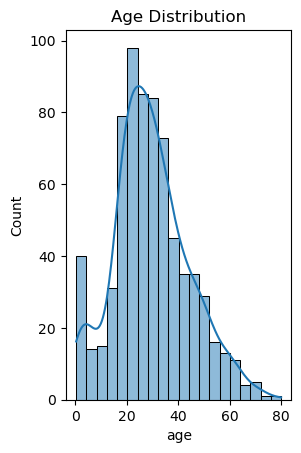

In [11]:
# Distribution of age
plt.subplot(1, 2, 1)
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')

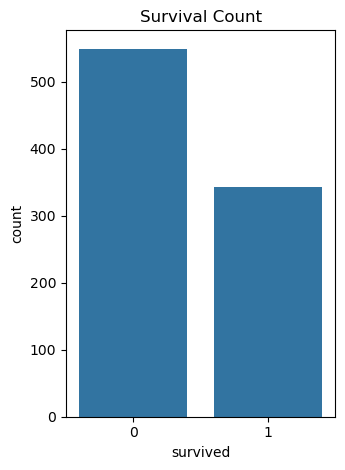

In [12]:
plt.subplot(1, 2, 2)
sns.countplot(x='survived', data=df)
plt.title('Survival Count')

plt.tight_layout()
plt.show()

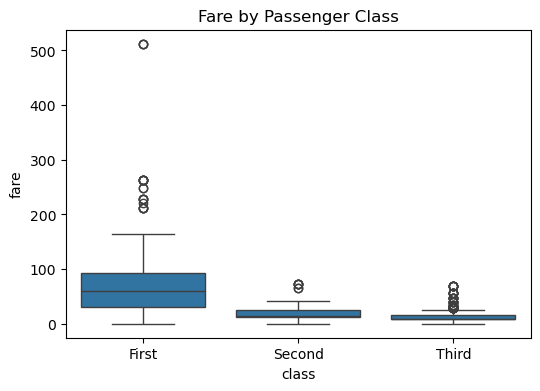

In [13]:
# Boxplot of fare by class
plt.figure(figsize=(6, 4))
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

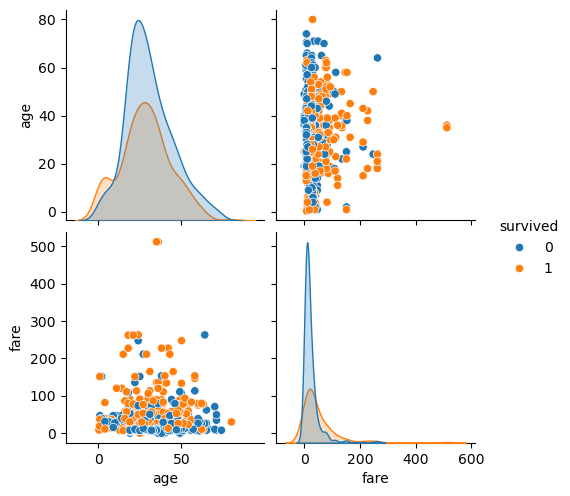

In [14]:
# Pairplot (numerical columns, drop rows with NA)
sns.pairplot(df.dropna(subset=['age', 'fare', 'survived']), vars=['age', 'fare'], hue='survived')
plt.show()